 _Perform Exploratory Data Analysis_ 

## . _Import Libraries_

In [1]:
# Libraries neeeded to work on the data
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pylab as pl
import scipy.stats as stats
import seaborn as sns
import pickle
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
import warnings
warnings.filterwarnings('ignore')


# Dataset has 271361 rows, jupyter notebook is crashing 
#if I don't limit the number of rows displayed below.
pd.set_option('display.max_columns', 1000) 
pd.set_option('display.max_rows', 1000)
pd.options.display.max_columns = 1000

## . _Import data_

In [36]:
df1 = pd.read_csv('books_final.csv')

In [ ]:
df2 = pd.read_csv('ratings_final.csv')

In [ ]:
df3 = pd.read_csv('users_final2.csv')

### _Merge_

In [ ]:
data_m = df1.merge(df2,on='isbn')

In [ ]:
data = data_m.merge(df3,on='user_id')
data

### _Check the data_

In [10]:
data.shape

(1031135, 15)

In [13]:
data.dtypes

Unnamed: 0_x            int64
isbn                   object
book_title             object
book_author            object
year_of_publication     int64
publisher              object
Unnamed: 0_y            int64
user_id                 int64
book_rating             int64
Unnamed: 0              int64
Unnamed: 0.1            int64
age                     int64
city                   object
region                 object
country                object
dtype: object

In [14]:
data.info

<bound method DataFrame.info of          Unnamed: 0_x        isbn  \
0                   0  0195153448   
1                   1  0002005018   
2                   2  0060973129   
3                   3  0374157065   
4                   4  0393045218   
...               ...         ...   
1031130        271055  087004124X   
1031131        271056  158243123X   
1031132        271057  8485900057   
1031133        271111  0838934854   
1031134        271184  3423300965   

                                                book_title  \
0                                      Classical Mythology   
1                                             Clara Callan   
2                                     Decision in Normandy   
3        Flu: The Story of the Great Influenza Pandemic...   
4                                   The Mummies of Urumchi   
...                                                    ...   
1031130                                             Anthem   
1031131                    

In [15]:
data.columns

Index(['Unnamed: 0_x', 'isbn', 'book_title', 'book_author',
       'year_of_publication', 'publisher', 'Unnamed: 0_y', 'user_id',
       'book_rating', 'Unnamed: 0', 'Unnamed: 0.1', 'age', 'city', 'region',
       'country'],
      dtype='object')

### _Drop columns_

In [16]:
data = data.drop(['Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0' , 'Unnamed: 0.1'],axis=1)

In [1]:
#data

### _Save_

Saving this preprocessed dataset so we can use it in MYSQL ...

In [17]:
data.to_csv(r'C:\Users\ASUS\Data Analytics\Projects\Recommended-Reading\Working\preprocessed_data.csv')

In [4]:
data = pd.read_csv('preprocessed_data.csv')

## . _Data exploring_

In [9]:
pd.set_option('max_row', None) # to get all the column
data.dtypes

Unnamed: 0              int64
isbn                   object
book_title             object
book_author            object
year_of_publication     int64
publisher              object
user_id                 int64
book_rating             int64
age                     int64
city                   object
region                 object
country                object
dtype: object

In [10]:
pd.set_option('max_row', None)
data.columns

Index(['Unnamed: 0', 'isbn', 'book_title', 'book_author',
       'year_of_publication', 'publisher', 'user_id', 'book_rating', 'age',
       'city', 'region', 'country'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031135 entries, 0 to 1031134
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   Unnamed: 0           1031135 non-null  int64 
 1   isbn                 1031135 non-null  object
 2   book_title           1031135 non-null  object
 3   book_author          1031135 non-null  object
 4   year_of_publication  1031135 non-null  int64 
 5   publisher            1031135 non-null  object
 6   user_id              1031135 non-null  int64 
 7   book_rating          1031135 non-null  int64 
 8   age                  1031135 non-null  int64 
 9   city                 1017033 non-null  object
 10  region               1030399 non-null  object
 11  country              1006761 non-null  object
dtypes: int64(5), object(7)
memory usage: 94.4+ MB


In [8]:
data.isna().sum()

Unnamed: 0                 0
isbn                       0
book_title                 0
book_author                0
year_of_publication        0
publisher                  0
user_id                    0
book_rating                0
age                        0
city                   14102
region                   736
country                24374
dtype: int64

In [ ]:
for col in data.select_dtypes('object'):
    print(data[col].value_counts(), '\n')

In [26]:
print(data['isbn'].unique())

['0195153448' '0002005018' '0060973129' ... '15655122046' '05162443314'
 nan]


In [20]:
print(data.groupby('book_rating').size())

book_rating
0     647294
1       1481
2       2375
3       5118
4       7617
5      45355
6      31687
7      66402
8      91803
9      60778
10     71225
dtype: int64


In [ ]:
plt.hist(data['age'].interpolate(method='polynomial', order=2), bins=20) 
plt.show()

In [ ]:
plt.hist(data['country'].fillna(data['average_balance'].mean()), bins=20)
plt.show()

In [ ]:
new_ratings_data = data['book_rating'][0:40].interpolate(method='linear')

new_ratings_data.plot()
plt.show()

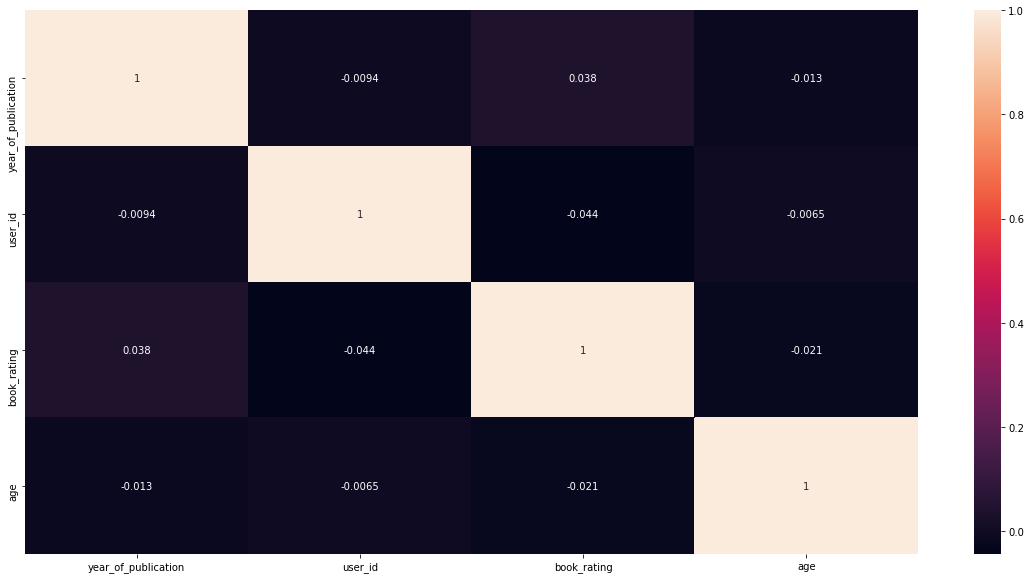

In [23]:
corr_matrix=data.corr(method='pearson') 
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(corr_matrix, annot=True)
#plt.show()

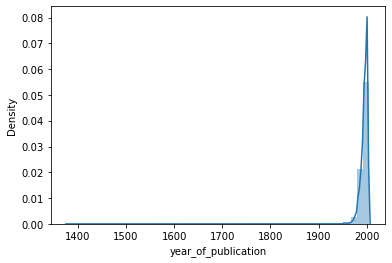

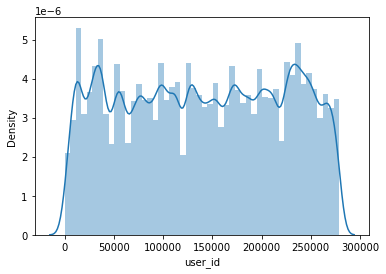

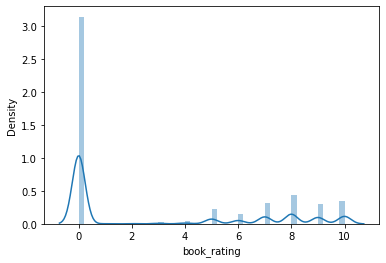

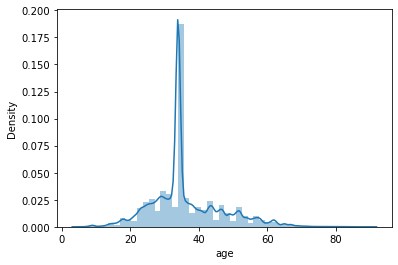

In [24]:
for col in data.select_dtypes(np.number):
    sns.distplot(data[col])
    plt.show()

In [ ]:
plt.rc("font", size=15)
data.book_rating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('rating')
plt.ylabel('Count')
plt.show()

## . _Data cleaning and wrangling_

In [12]:
# New index 
data = data.set_index('isbn')


In [ ]:
for column in data.select_dtypes(np.number).columns:
    sns.distplot(data[column])
    #plt.show()
    mask = np.zeros_like(data.corr())

## . _Modeling_

In [ ]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)

In [ ]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')
model.fit(book_sparse)

In [ ]:
distances, suggestions = model.kneighbors(book_pivot.iloc[237, :].values.reshape(1, -1))

In [ ]:
for i in range(len(suggestions)):
  print(book_pivot.index[suggestions[i]])

In [3]:
num = data.select_dtypes('number')
for c in num.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.set_style("darkgrid")
    sns.distplot(num[c], ax=axes[0],  color = 'gray')
    sns.boxplot(num[c], ax=axes[1],  color = 'gray')
    plt.show()

NameError: name 'data' is not defined

## . _Build Models : Unsupervised learning_

Unsupervised learning because we do not have a clear way to tell whether the algorithm is doing well or not - in SL, predictions can be compared with true values (labels) - here there are no performance metrics with which to supervise the task.

Clustering: The most popular task in UL is Clustering. It's popular in the business world because companies usually have big unlabeled datasets of customers.They need to segment those customers in order to make effective decisions like: understanding their behavior, sending targeted emails, offering loyalty promotions, tailoring new products, etc. Clustering algorithms find observations with similarities and group themselves.

Clustering vs. traditional segmentation: Traditionally, subject experts were the ones creating the segmentation: maybe they had some data showing that, in general, customers under and over 25 years old behave differently, and that gender is a clear divide when it comes to shopping. Rich datasets and clustering algorithms can challenge these traditional segmentation. If an e-commerce site has click-through rates in multiple stages of the marketing funnel, email-opening rates and a history of products searched, added to a wish list and purchased (each divided in a few variables by category of product), it's much more difficult to use "instinct" or a couple of bar charts to segment the customers. However, clustering algorithms can find groups of customers that are similar based on these behavioral variables.

### _KMEANS_

In [ ]:
import pandas as pd
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
# y = pd.Series(data["target"])

X.head()

In [ ]:
# K-Means is a distance based algorithm: we need to scale / normalize:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X)

pd.DataFrame(X_prep).head()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_prep)

In [ ]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)
clusters

In [ ]:
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

In [ ]:
# Explore the cluster assignment in the original dataset
X_df = pd.DataFrame(X)
X_df["cluster"] = clusters
X_df.head()

X_df['cluster'] = X_df['cluster'].apply(lambda x: 0 if x == 1 else 1 if x == 2 else 2)
X_df

In [ ]:
# Class Weigh

### . _Choosing the best value of k for the KNN_

In [144]:
from sklearn.neighbors import KNeighborsRegressor
scores = []
for i in range(2,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

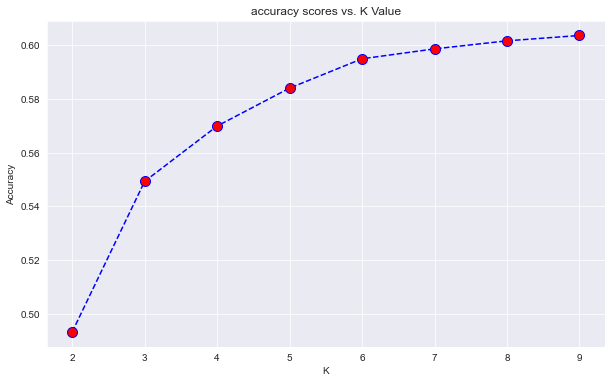

In [145]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [146]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(y_test, predictions)
score

194.750812033821

In [147]:
from sklearn.metrics import mean_squared_error
score = mean_squared_error(y_test, predictions)
score

67841.48765657935

In [148]:
import math
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
rmse

260.46398533497745

### . _R-squared value_

In [150]:
from sklearn.metrics import r2_score
score = r2_score(y_test, predictions)
score

0.45378463851113215

In [153]:
score = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
score

0.4479695440778191

### . _Model Validation_

In [154]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.45378463851113215, 260.46398533497745, 67841.48765657935)

In [155]:
mse = mean_squared_error(y_test, predictions)
print(mse)

67841.48765657935


In [156]:
rmse = math.sqrt(mse)
print(rmse)

260.46398533497745


In [157]:
r2 = r2_score(y_test, predictions)
print(r2)

0.45378463851113215


In [158]:
n = len(X_test)
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
print(adj_r2)

0.45185311201414946
